In [1]:
import os
import pandas as pd
import numpy as np
import random
import math
from decimal import Decimal

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import Normalizer

import matplotlib.pyplot as plt

In [2]:
# Visualize  

def accurayPlot(x, y): 
    figName, ax = plt.subplots()
    ax.scatter(x, y, edgecolors=(0,0,0))
    ax.plot([x.min(), x.max()], [x.min(), x.max()], 'k--')
    ax.set_title(ml+' cross-validation, cv = '+str(numcv))
    ax.set_xlabel('Actual value')
    ax.set_ylabel('Predicted')
    plt.show()
    return figName

In [3]:
def addValues(ax):
    values = []
    for i in ax.patches: 
        values.append(i.get_height())
    
    total = sum(values)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        #ax.text(i.get_x()-.05, i.get_height()+.1, str(round((i.get_height()/total)*100, 2))+'%', fontsize=15)
        # ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height),ha='center', va='bottom')
        ax.text(i.get_x()+0.15, i.get_height(), str(round(i.get_height(), 3)), ha='center', va='bottom', fontsize=9)

In [4]:
path = 'D:/Bioinformatics/Diplom/'
file = 'RawData_200.csv'
dfRawData200 = pd.read_csv(path+'ML/ '+file)

file = 'RawData_45.csv'
dfRawData45 = pd.read_csv(path+'ML/ '+file)

dfAllRD = dfRawData200
dfAllRD = dfAllRD.append(dfRawData45, ignore_index=True)
dfAllRD.head()

,Unnamed: 0,name,Length,X1,X2,E,S,L
0,0,1atx_,46,839,21.2,-1.500708,-58.865890,57.365182
1,1,1agg_,48,851,22.2,-1.797210,-60.767012,58.969802
2,2,1akhA,49,925,22.4,-5.642586,-53.350390,47.707804
3,3,1afp_,51,961,22.8,-5.542472,-72.049554,66.507082
4,4,1apq_,53,946,25.3,-3.719619,-62.522390,58.802771


In [5]:
dfAllRD[dfAllRD.L == 550.1807073071892]

,Unnamed: 0,name,Length,X1,X2,E,S,L
239,39,1nd7,374,7248,74.8,83.189263,-466.991445,550.180707


In [6]:
dfAllRD = dfAllRD.drop(dfAllRD.index[239])
dfAllRD[dfAllRD.L == 550.1807073071892]

,Unnamed: 0,name,Length,X1,X2,E,S,L


In [7]:
len(dfAllRD)

244

In [8]:
# Normalize and transform the values for the two parameters (X1 - seq, and X2 - pattern)

t1 = Normalizer().fit([dfAllRD.X1])
x1 = t1.transform([dfAllRD.X1])

t2 = Normalizer().fit([dfAllRD.X2])
x2 = t1.transform([dfAllRD.X2])

In [9]:
# Create a DF for the parameters
dfData = pd.DataFrame()
dfData["x1"] = x1[0]
dfData["x2"] = x2[0]

# Actual values (Y)
E = dfAllRD.E
L = dfAllRD.L

In [10]:
# Number of cross-validations: 
numcv = 5

In [11]:
os.chdir("D:/Bioinformatics/Diplom/ML/Images/") 

In [12]:
# Lasso

model = linear_model.Lasso(alpha=0.1)

0.22501768544601386
[-0.02870483 -0.85796885 -1.17842718 -1.58913598 -0.57114   ]


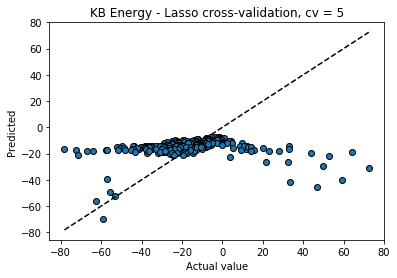

{'fit_time': array([0., 0., 0., 0., 0.]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([-0.02870483, -0.85796885, -1.17842718, -1.58913598, -0.57114   ]), 'train_score': array([0.18976357, 0.25163954, 0.23882883, 0.05711442, 0.48746166])}


In [13]:
# E
ml = 'KB Energy - Lasso'

model.fit(dfData, E.tolist())
print(model.score(dfData, E.tolist()))

predicted = cross_val_predict(model, dfData, E.tolist(), cv=numcv)
print(cross_val_score(model,  dfData, E.tolist(), cv=numcv))

fig = accurayPlot(E, predicted)

lassoE = cross_validate(model, dfData, E.tolist(), cv=numcv)
print(lassoE)

fig.savefig('lassoE_cv'+str(numcv)+'.png', dpi=1000)

0.32962202072129176
[-2.11092956 -0.62073786  0.05082177 -0.00923434 -0.16013764]


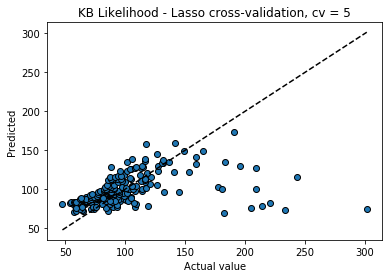

{'fit_time': array([0.        , 0.        , 0.00504708, 0.00099754, 0.        ]), 'score_time': array([0.00500846, 0.        , 0.00035548, 0.00100088, 0.        ]), 'test_score': array([-2.11092956, -0.62073786,  0.05082177, -0.00923434, -0.16013764]), 'train_score': array([0.23274116, 0.3117748 , 0.34410441, 0.32174547, 0.59286414])}


In [14]:
# L
ml = 'KB Likelihood - Lasso'

model.fit(dfData, L.tolist())
print(model.score(dfData, L.tolist()))

predicted = cross_val_predict(model, dfData, L.tolist(), cv=numcv)
print(cross_val_score(model,  dfData, L.tolist(), cv=numcv))

fig = accurayPlot(L, predicted)

lassoL = cross_validate(model, dfData, L.tolist(), cv=numcv)
print(lassoL)

fig.savefig('lassoL_cv'+str(numcv)+'.png', dpi=1000)

In [15]:
# 1.6.3. Nearest Neighbors Regression
model = KNeighborsRegressor(n_neighbors=2)

[ -2.17556079  -5.47347872 -11.6203209  -14.31968828  -0.51035694]


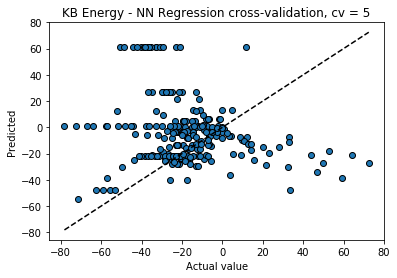

{'fit_time': array([0.        , 0.        , 0.        , 0.        , 0.00977254]), 'score_time': array([0.        , 0.01032853, 0.        , 0.        , 0.        ]), 'test_score': array([ -2.17556079,  -5.47347872, -11.6203209 , -14.31968828,
        -0.51035694]), 'train_score': array([0.81677715, 0.82708774, 0.83316637, 0.76436683, 0.79774661])}


In [16]:
# E
ml = 'KB Energy - NN Regression'

predicted = cross_val_predict(model, dfData, E.tolist(), cv=numcv)
print(cross_val_score(model,  dfData, E.tolist(), cv=numcv))

fig = accurayPlot(E, predicted)

nnrE = cross_validate(model, dfData, E.tolist(), cv=numcv)
print(nnrE)

fig.savefig('nnrE_cv'+str(numcv)+'.png', dpi=1000)

[ -0.52528784  -1.44793347  -1.17059366 -10.50284575  -0.19235595]


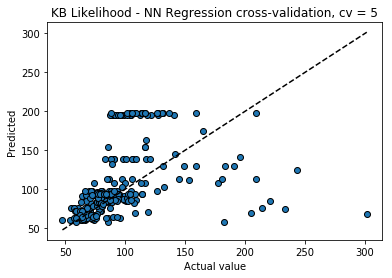

{'fit_time': array([0.00201607, 0.00101376, 0.00198603, 0.00101519, 0.00099945]), 'score_time': array([0.000983  , 0.00099826, 0.        , 0.0009985 , 0.00099969]), 'test_score': array([ -0.52528784,  -1.44793347,  -1.17059366, -10.50284575,
        -0.19235595]), 'train_score': array([0.85828407, 0.87875533, 0.88750022, 0.88898425, 0.86362565])}


In [17]:
# L
ml = 'KB Likelihood - NN Regression'

predicted = cross_val_predict(model, dfData, L.tolist(), cv=numcv)
print(cross_val_score(model,  dfData, L.tolist(), cv=numcv))

fig = accurayPlot(L, predicted)

nnrL = cross_validate(model, dfData, L.tolist(), cv=numcv)
print(nnrL)

fig.savefig('nnrL_cv'+str(numcv)+'.png', dpi=1000)

In [18]:
# 1.10.2. Regression - Decisiion Tree  Regresion
model = tree.DecisionTreeRegressor()

[ -7.73313564  -6.66550398 -36.17661091 -22.9494816   -0.48919351]


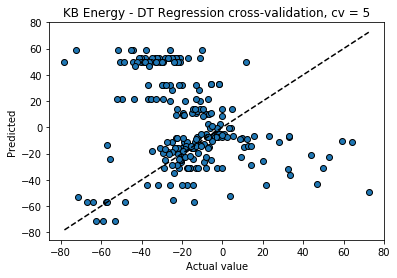

{'fit_time': array([0.       , 0.       , 0.0102253, 0.       , 0.       ]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([ -7.51479659,  -7.37199913, -36.27061763, -19.95687289,
        -0.48109086]), 'train_score': array([1., 1., 1., 1., 1.])}


In [19]:
# E
ml = 'KB Energy - DT Regression'

predicted = cross_val_predict(model, dfData, E.tolist(), cv=numcv)
print(cross_val_score(model,  dfData, E.tolist(), cv=numcv))

fig = accurayPlot(E, predicted)

dtrE = cross_validate(model, dfData, E.tolist(), cv=numcv)
print(dtrE)

fig.savefig('dtrE_cv'+str(numcv)+'.png', dpi=1000)

[-2.28999532 -2.54069115 -1.62331148 -9.19435972 -0.19252277]


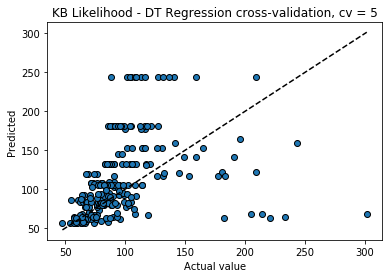

{'fit_time': array([0.00975156, 0.        , 0.        , 0.        , 0.        ]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([ -2.28492906,  -2.9801308 ,  -1.62602875, -13.69531475,
        -0.17199281]), 'train_score': array([1., 1., 1., 1., 1.])}


In [20]:
# L
ml = 'KB Likelihood - DT Regression'

predicted = cross_val_predict(model, dfData, L.tolist(), cv=numcv)
print(cross_val_score(model,  dfData, L.tolist(), cv=numcv))

fig = accurayPlot(L, predicted)

dtrL = cross_validate(model, dfData, L.tolist(), cv=numcv)
print(dtrL)

fig.savefig('dtrL_cv'+str(numcv)+'.png', dpi=1000)

In [21]:
Mean_FitTimeE = [np.mean(lassoE['fit_time']), np.mean(nnrE['fit_time']), np.mean(dtrE['fit_time'])]
Mean_ScoreTimeE = [np.mean(lassoE['score_time']), np.mean(nnrE['score_time']), np.mean(dtrE['score_time'])]
Mean_TestScoreE = [np.mean(lassoE['test_score']), np.mean(nnrE['test_score']), np.mean(dtrE['test_score'])]
Mean_TrainScoreE = [np.mean(lassoE['train_score']), np.mean(nnrE['train_score']), np.mean(dtrE['train_score'])]

Mean_FitTimeL = [np.mean(lassoL['fit_time']), np.mean(nnrL['fit_time']), np.mean(dtrL['fit_time'])]
Mean_ScoreTimeL = [np.mean(lassoL['score_time']), np.mean(nnrL['score_time']), np.mean(dtrL['score_time'])]
Mean_TestScoreL = [np.mean(lassoL['test_score']), np.mean(nnrL['test_score']), np.mean(dtrL['test_score'])]
Mean_TrainScoreL = [np.mean(lassoL['train_score']), np.mean(nnrL['train_score']), np.mean(dtrL['train_score'])]

SD_FitTimeE = [np.std(lassoE['fit_time']), np.std(nnrE['fit_time']), np.std(dtrE['fit_time'])]
SD_ScoreTimeE = [np.std(lassoE['score_time']), np.std(nnrE['score_time']), np.std(dtrE['score_time'])]
SD_TestScoreE = [np.std(lassoE['test_score']), np.std(nnrE['test_score']), np.std(dtrE['test_score'])]
SD_TrainScoreE = [np.std(lassoE['train_score']), np.std(nnrE['train_score']), np.std(dtrE['train_score'])]

SD_FitTimeL = [np.std(lassoL['fit_time']), np.std(nnrL['fit_time']), np.std(dtrL['fit_time'])]
SD_ScoreTimeL = [np.std(lassoL['score_time']), np.std(nnrL['score_time']), np.std(dtrL['score_time'])]
SD_TestScoreL = [np.std(lassoL['test_score']), np.std(nnrL['test_score']), np.std(dtrL['test_score'])]
SD_TrainScoreL = [np.std(lassoL['train_score']), np.std(nnrL['train_score']), np.std(dtrL['train_score'])]

labels = ['Lasso', 'NN Reg', 'DecisionTree Reg']


C:\Users\katse\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


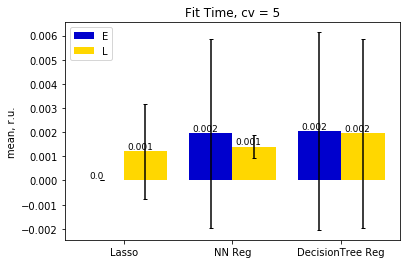

In [22]:
N = len(labels)

ind = np.arange(N) # the x locations for the groups
width = 0.40       # the width of the bars
fitTime, ax = plt.subplots()
graphE = ax.bar(ind, Mean_FitTimeE, width, color='mediumblue', yerr = SD_FitTimeE, capsize=2)
graphL = ax.bar(ind + width, Mean_FitTimeL, width, color='gold', yerr = SD_FitTimeL, capsize=2)

# Add text for labels, title and axes ticks
ax.set_ylabel('mean, r.u.')
ax.set_title('Fit Time, cv = '+str(numcv))
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((labels))

ax.legend((graphE[0], graphL[0]), ('E', 'L'))

addValues(ax)

plt.show()

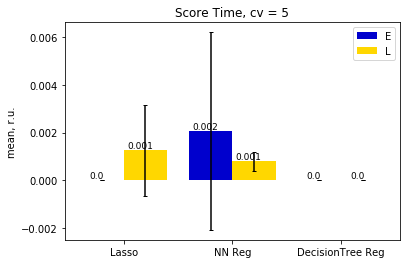

In [23]:
N = len(labels)

ind = np.arange(N) # the x locations for the groups
width = 0.40       # the width of the bars
scoreTime, ax = plt.subplots()
graphE = ax.bar(ind, Mean_ScoreTimeE, width, color='mediumblue', yerr = SD_ScoreTimeE, capsize=2)
graphL = ax.bar(ind + width, Mean_ScoreTimeL, width, color='gold', yerr = SD_ScoreTimeL, capsize=2)

# Add text for labels, title and axes ticks
ax.set_ylabel('mean, r.u.')
ax.set_title('Score Time, cv = '+str(numcv))
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((labels))

ax.legend((graphE[0], graphL[0]), ('E', 'L'))

addValues(ax)

plt.show()

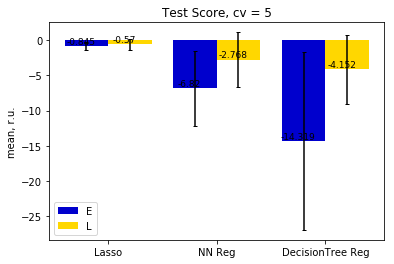

In [24]:
N = len(labels)

ind = np.arange(N) # the x locations for the groups
width = 0.40       # the width of the bars
testScore, ax = plt.subplots()
graphE = ax.bar(ind, Mean_TestScoreE, width, color='mediumblue', yerr = SD_TestScoreE, capsize=2)
graphL = ax.bar(ind + width, Mean_TestScoreL, width, color='gold', yerr = SD_TestScoreL, capsize=2)

# Add text for labels, title and axes ticks
ax.set_ylabel('mean, r.u.')
ax.set_title('Test Score, cv = '+str(numcv))
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((labels))

ax.legend((graphE[0], graphL[0]), ('E', 'L'))

addValues(ax)

plt.show()

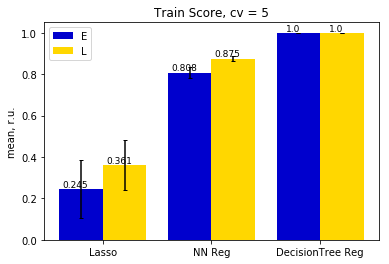

In [25]:
N = len(labels)

ind = np.arange(N) # the x locations for the groups
width = 0.40       # the width of the bars
trainScore, ax = plt.subplots()
graphE = ax.bar(ind, Mean_TrainScoreE, width, color='mediumblue', yerr = SD_TrainScoreE, capsize=2)
graphL = ax.bar(ind + width, Mean_TrainScoreL, width, color='gold', yerr = SD_TrainScoreL, capsize=2)

# Add text for labels, title and axes ticks
ax.set_ylabel('mean, r.u.')
ax.set_title('Train Score, cv = '+str(numcv))
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((labels))

ax.legend((graphE[0], graphL[0]), ('E', 'L'))

addValues(ax)

plt.show()

In [ ]:
os.chdir("D:/Bioinformatics/Diplom/ML/Images/") 

fitTime.savefig('fitTime_cv'+str(numcv)+'.png', dpi=1000)
scoreTime.savefig('scoreTime_cv'+str(numcv)+'.png', dpi=1000)
testScore.savefig('testScore_cv'+str(numcv)+'.png', dpi=1000)
trainScore.savefig('trainScore_cv'+str(numcv)+'.png', dpi=1000)